In [83]:
import pulp
import networkx as nx
import matplotlib.pyplot as plt

# Exercise

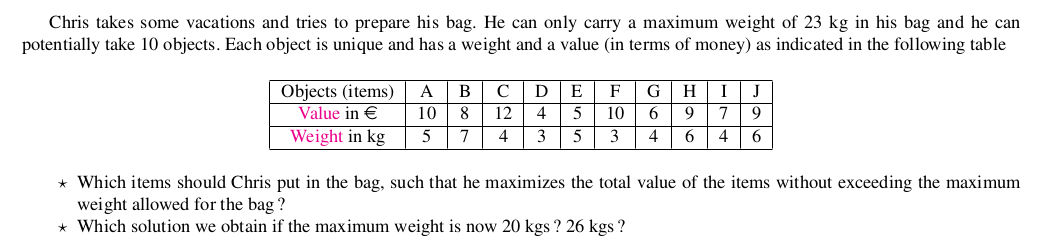

In [84]:
import pulp

# Define the items, their values, and weights
items = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
values = {'A': 10, 'B': 8, 'C': 12, 'D': 4, 'E': 5, 'F': 10, 'G': 6, 'H': 9, 'I': 7, 'J': 9}
weights = {'A': 5, 'B': 7, 'C': 4, 'D': 3, 'E': 5, 'F': 3, 'G': 4, 'H': 6, 'I': 4, 'J': 6}

def solve_knapsack(max_weight):
    knapsack = pulp.LpProblem("MaximizeValue", pulp.LpMaximize)

    x = pulp.LpVariable.dicts("Take", items, cat='Binary')

    knapsack += pulp.lpSum([values[item] * x[item] for item in items])

    knapsack += pulp.lpSum([weights[item] * x[item] for item in items]) <= max_weight

    knapsack.solve(pulp.PULP_CBC_CMD(msg=False))

    print(f"Items to take for max weight {max_weight} kg:")
    total_value = 0
    total_weight = 0
    for item in items:
        if x[item].value() == 1:
            print(f"Item: {item}, Value: {values[item]}, Weight: {weights[item]}")
            total_value += values[item]
            total_weight += weights[item]

    print(f"Total value: {total_value}")
    print(f"Total weight: {total_weight} / {max_weight} kg")

solve_knapsack(23)

Items to take for max weight 23 kg:
Item: A, Value: 10, Weight: 5
Item: C, Value: 12, Weight: 4
Item: D, Value: 4, Weight: 3
Item: F, Value: 10, Weight: 3
Item: G, Value: 6, Weight: 4
Item: I, Value: 7, Weight: 4
Total value: 49
Total weight: 23 / 23 kg


In [85]:
solve_knapsack(20)

Items to take for max weight 20 kg:
Item: A, Value: 10, Weight: 5
Item: C, Value: 12, Weight: 4
Item: F, Value: 10, Weight: 3
Item: G, Value: 6, Weight: 4
Item: I, Value: 7, Weight: 4
Total value: 45
Total weight: 20 / 20 kg


In [86]:
solve_knapsack(26)

Items to take for max weight 26 kg:
Item: A, Value: 10, Weight: 5
Item: C, Value: 12, Weight: 4
Item: F, Value: 10, Weight: 3
Item: G, Value: 6, Weight: 4
Item: H, Value: 9, Weight: 6
Item: I, Value: 7, Weight: 4
Total value: 54
Total weight: 26 / 26 kg


# How to visit Paris ?

John Doe, an American researcher, goes to Paris to present an article at a conference. It is his first time in the French capital. He arrives on Monday and he intends to spend the whole week at the conference. However, the conference ends on Friday, and Mr. Doe 4leaves only on Sunday in the end evening. So he has the opportunity to visit the city during the weekend. He gives himself 14 hours for the two days to fully visit Paris with a maximum budget of 75 e.

By doing his own research (via some social medias for instance), he finds that it is interesting to visit : La Tour Eiffel (TE), Le Musée du louvre (ML), l’Arc de triomphe (AT), le Musée d’Orsay (MO), le Jardin des tuileries (JT), les Catacombes (CA), le Centre Pompidou (CP), la Cathédrale Notre Dame de Paris (CN), la Basilique du Sacré-Coeur (BS), la Sainte Chapelle (SC), La Place de la Concorde (PC), la Tour Montparnasse (TM) and l’Avenue des Champs-Elysées (AC).

For each of these places or monuments, he obtained the following information which could help him to make his choices :
• the duration of a visit (in hours)
• the global appreciation of Internet users (given by a qualitative score : from * to *****)
• the price for a single visit.

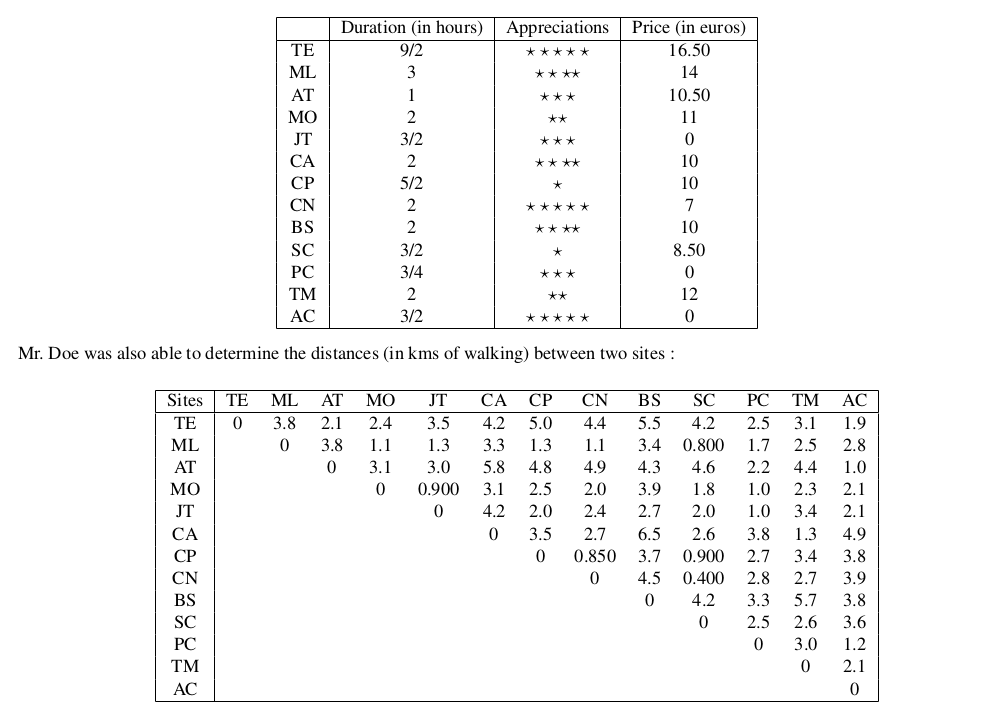

Our aim is to help Mr Doe to choose some sites to visit during these two days. You can use some linear programming models or another approach to do this. Use a python code to answer the following questions :

## 1. It is assumed that Mr. Doe gives equal importance to each tourist site, and he wants to visit the maximum number of sites.

### (a) Which list(s) of places could you recommend to him ? This solution will be called ListVisit 1.

In [87]:
sites = ['TE', 'ML', 'AT', 'MO', 'JT', 'CA', 'CP', 'CN', 'BS', 'SC', 'PC', 'TM', 'AC']
durations = {'TE': 9/2, 'ML': 3, 'AT': 1, 'MO': 2, 'JT': 3/2, 'CA': 2, 'CP': 5/2, 'CN': 2, 'BS': 2, 'SC': 3/2, 'PC': 3/4, 'TM': 2, 'AC': 3/2}
prices = {'TE': 16.50, 'ML': 14, 'AT': 10.50, 'MO': 11, 'JT': 0, 'CA': 10, 'CP': 10, 'CN': 7, 'BS': 10, 'SC': 8.50, 'PC': 0, 'TM': 12, 'AC': 0}

ListVisit1 = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat=pulp.LpBinary)

ListVisit1 += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit1 += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit1 += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

ListVisit1.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [88]:
print("ListVisit 1:")
for site in sites:
    if x[site].value() == 1:
        print(site)

ListVisit 1:
AT
MO
JT
CN
BS
SC
PC
AC


### (b) Which list(s) of places could you recommend to him if Doe’s budget is now 65 e, the maximum duration still being 14 hours ?

In [89]:
sites = ['TE', 'ML', 'AT', 'MO', 'JT', 'CA', 'CP', 'CN', 'BS', 'SC', 'PC', 'TM', 'AC']
durations = {'TE': 9/2, 'ML': 3, 'AT': 1, 'MO': 2, 'JT': 3/2, 'CA': 2, 'CP': 5/2, 'CN': 2, 'BS': 2, 'SC': 3/2, 'PC': 3/4, 'TM': 2, 'AC': 3/2}
prices = {'TE': 16.50, 'ML': 14, 'AT': 10.50, 'MO': 11, 'JT': 0, 'CA': 10, 'CP': 10, 'CN': 7, 'BS': 10, 'SC': 8.50, 'PC': 0, 'TM': 12, 'AC': 0}

ListVisit2 = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat=pulp.LpBinary)

ListVisit2 += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit2 += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit2 += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 65

ListVisit2.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [90]:
print("ListVisit 2:")
for site in sites:
    if x[site].value() == 1:
        print(site)

ListVisit 2:
AT
MO
JT
CN
BS
SC
PC
AC


### (c) Which list(s) of places could you recommend to him if Doe’s budget is now 90 eand the maximum duration being 10 hours ?

In [91]:
sites = ['TE', 'ML', 'AT', 'MO', 'JT', 'CA', 'CP', 'CN', 'BS', 'SC', 'PC', 'TM', 'AC']
durations = {'TE': 9/2, 'ML': 3, 'AT': 1, 'MO': 2, 'JT': 3/2, 'CA': 2, 'CP': 5/2, 'CN': 2, 'BS': 2, 'SC': 3/2, 'PC': 3/4, 'TM': 2, 'AC': 3/2}
prices = {'TE': 16.50, 'ML': 14, 'AT': 10.50, 'MO': 11, 'JT': 0, 'CA': 10, 'CP': 10, 'CN': 7, 'BS': 10, 'SC': 8.50, 'PC': 0, 'TM': 12, 'AC': 0}

ListVisit3 = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat=pulp.LpBinary)

ListVisit3 += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit3 += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 10
# 2. Total price cannot exceed 75 euros
ListVisit3 += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 90

ListVisit3.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [92]:
print("ListVisit 3:")
for site in sites:
    if x[site].value() == 1:
        print(site)

ListVisit 3:
AT
MO
CN
SC
PC
AC


## 2. We keep the budget of 75 eand the maximum duration being 14 hours. Actually, Mr. Doe has some preferences among these tourist sites and he expresses them as follows :

• Preference 1 : If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.

• Preference 2 : He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).

• Preference 3 : If he visits Avenue Champs Elysées (AC) then he will not visit the Sainte Chapelle (SC).

• Preference 4 : He absolutely wants to visit Arc de triomphe (AT).

• Preference 5 : If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).

### (a) For each of the five preferences above, suggest to Mr. Doe, one or more lists of tourist sites to visit. Are the obtained lists different from the solution ListVisit 1 ? To answer this last question, you can implement a python function returning True (respectively False) if two lists are identical (respectively different).

In [93]:
distances = {
    'TE': {'TE': 0, 'ML': 3.8, 'AT': 2.1, 'MO': 2.4, 'JT': 3.5, 'CA': 4.2, 'CP': 5.0, 'CN': 4.4, 'BS': 5.5, 'SC': 4.2, 'PC': 2.5, 'TM': 3.1, 'AC': 1.9},
    'ML': {'TE': 3.8, 'ML': 0, 'AT': 3.8, 'MO': 1.1, 'JT': 1.3, 'CA': 3.3, 'CP': 1.3, 'CN': 1.1, 'BS': 3.4, 'SC': 0.8, 'PC': 1.7, 'TM': 2.5, 'AC': 2.8},
    'AT': {'TE': 2.1, 'ML': 3.8, 'AT': 0, 'MO': 3.1, 'JT': 3.0, 'CA': 5.8, 'CP': 4.8, 'CN': 4.9, 'BS': 4.3, 'SC': 4.6, 'PC': 2.2, 'TM': 1.0, 'AC': 1.0},
    'MO': {'TE': 2.4, 'ML': 1.1, 'AT': 3.1, 'MO': 0, 'JT': 0.9, 'CA': 3.1, 'CP': 2.5, 'CN': 2.0, 'BS': 3.9, 'SC': 1.8, 'PC': 1.0, 'TM': 2.3, 'AC': 2.1},
    'JT': {'TE': 3.5, 'ML': 1.3, 'AT': 3.0, 'MO': 0.9, 'JT': 0, 'CA': 4.2, 'CP': 2.0, 'CN': 2.4, 'BS': 2.7, 'SC': 2.0, 'PC': 1.0, 'TM': 3.4, 'AC': 2.1},
    'CA': {'TE': 4.2, 'ML': 3.3, 'AT': 5.8, 'MO': 3.1, 'JT': 4.2, 'CA': 0, 'CP': 3.5, 'CN': 2.7, 'BS': 6.5, 'SC': 2.6, 'PC': 3.8, 'TM': 1.3, 'AC': 4.9},
    'CP': {'TE': 5.0, 'ML': 1.3, 'AT': 4.8, 'MO': 2.5, 'JT': 2.0, 'CA': 3.5, 'CP': 0, 'CN': 0.85, 'BS': 3.7, 'SC': 0.9, 'PC': 2.7, 'TM': 3.4, 'AC': 3.8},
    'CN': {'TE': 4.4, 'ML': 1.1, 'AT': 4.9, 'MO': 2.0, 'JT': 2.4, 'CA': 2.7, 'CP': 0.85, 'CN': 0, 'BS': 4.5, 'SC': 0.4, 'PC': 2.8, 'TM': 2.7, 'AC': 3.9},
    'BS': {'TE': 5.5, 'ML': 3.4, 'AT': 4.3, 'MO': 3.9, 'JT': 2.7, 'CA': 6.5, 'CP': 3.7, 'CN': 4.5, 'BS': 0, 'SC': 4.2, 'PC': 3.3, 'TM': 5.7, 'AC': 3.8},
    'SC': {'TE': 4.2, 'ML': 0.8, 'AT': 4.6, 'MO': 1.8, 'JT': 2.0, 'CA': 2.6, 'CP': 0.9, 'CN': 0.4, 'BS': 4.2, 'SC': 0, 'PC': 2.5, 'TM': 2.6, 'AC': 3.6},
    'PC': {'TE': 2.5, 'ML': 1.7, 'AT': 2.2, 'MO': 1.0, 'JT': 1.0, 'CA': 3.8, 'CP': 2.7, 'CN': 2.8, 'BS': 3.3, 'SC': 2.5, 'PC': 0, 'TM': 3.0, 'AC': 1.2},
    'TM': {'TE': 3.1, 'ML': 2.5, 'AT': 1.0, 'MO': 2.3, 'JT': 3.4, 'CA': 1.3, 'CP': 3.4, 'CN': 2.7, 'BS': 5.7, 'SC': 2.6, 'PC': 3.0, 'TM': 0, 'AC': 2.1},
    'AC': {'TE': 1.9, 'ML': 2.8, 'AT': 1.0, 'MO': 2.1, 'JT': 2.1, 'CA': 4.9, 'CP': 3.8, 'CN': 3.9, 'BS': 3.8, 'SC': 3.6, 'PC': 1.2, 'TM': 2.1, 'AC': 0}
}

sites = list(distances.keys())
durations = {'TE': 9/2, 'ML': 3, 'AT': 1, 'MO': 2, 'JT': 3/2, 'CA': 2, 'CP': 5/2, 'CN': 2, 'BS': 2, 'SC': 3/2, 'PC': 3/4, 'TM': 2, 'AC': 3/2}
prices = {'TE': 16.50, 'ML': 14, 'AT': 10.50, 'MO': 11, 'JT': 0, 'CA': 10, 'CP': 10, 'CN': 7, 'BS': 10, 'SC': 8.50, 'PC': 0, 'TM': 12, 'AC': 0}

In [94]:
# Preference 1: Visit sites within 1 km radius
def solve_preference_1():
    ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)
    x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')
    
    ListVisit += pulp.lpSum([x[site] for site in sites])

    ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
    ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

    # Preference 1: Visit sites within a radius of 1 km
    for site1 in sites:
        for site2 in sites:
            if site1 != site2 and distances[site1][site2] <= 1:
                ListVisit += x[site1] == x[site2]

    ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))
    return [site for site in sites if x[site].value() == 1]

# Preference 2: Must visit TE and CA
def solve_preference_2():
    ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)
    x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

    ListVisit += pulp.lpSum([x[site] for site in sites])

    ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
    ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

    # Preference 2: Must visit TE and CA
    ListVisit += x['TE'] == 1
    ListVisit += x['CA'] == 1

    ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))
    return [site for site in sites if x[site].value() == 1]

# Preference 3: If AC is visited, do not visit SC
def solve_preference_3():
    ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)
    x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

    ListVisit += pulp.lpSum([x[site] for site in sites])

    ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
    ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

    # Preference 3: If AC is visited, do not visit SC
    ListVisit += x['AC'] + x['SC'] <= 1

    ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))
    return [site for site in sites if x[site].value() == 1]

# Preference 4: Must visit AT
def solve_preference_4():
    ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)
    x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

    ListVisit += pulp.lpSum([x[site] for site in sites])

    ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
    ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

    # Preference 4: Must visit AT
    ListVisit += x['AT'] == 1

    ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))
    return [site for site in sites if x[site].value() == 1]

# Preference 5: If ML is visited, MO must be visited
def solve_preference_5():
    ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)
    x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

    ListVisit += pulp.lpSum([x[site] for site in sites])

    ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
    ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

    # Preference 5: If ML is visited, MO must be visited
    ListVisit += x['ML'] <= x['MO']

    ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))
    return [site for site in sites if x[site].value() == 1]

# Function to compare two lists
def compare_lists(list1, list2):
    return set(list1) == set(list2)

# Original ListVisit 1
ListVisit_1 = ['AT', 'MO', 'JT', 'CN', 'BS', 'SC', 'PC', 'AC']

# Solve for each preference
solutions = {
    "Preference 1": solve_preference_1(),
    "Preference 2": solve_preference_2(),
    "Preference 3": solve_preference_3(),
    "Preference 4": solve_preference_4(),
    "Preference 5": solve_preference_5(),
}

# Print results and compare with ListVisit 1
for pref, solution in solutions.items():
    print(f"{pref} Solution: {solution}")
    identical = compare_lists(ListVisit_1, solution)
    print(f"Is the solution identical to ListVisit 1? {'Yes' if identical else 'No'}\n")

Preference 1 Solution: ['AT', 'MO', 'JT', 'CA', 'BS', 'PC', 'TM', 'AC']
Is the solution identical to ListVisit 1? No

Preference 2 Solution: ['TE', 'AT', 'MO', 'CA', 'SC', 'PC', 'AC']
Is the solution identical to ListVisit 1? No

Preference 3 Solution: ['AT', 'MO', 'JT', 'CN', 'BS', 'PC', 'TM', 'AC']
Is the solution identical to ListVisit 1? No

Preference 4 Solution: ['AT', 'MO', 'JT', 'CN', 'BS', 'SC', 'PC', 'AC']
Is the solution identical to ListVisit 1? Yes

Preference 5 Solution: ['AT', 'JT', 'CN', 'BS', 'SC', 'PC', 'TM', 'AC']
Is the solution identical to ListVisit 1? No



### (b) If Mr. Doe wishes, at the same time, to take into account Preference 1 and Preference 2, which list(s) would you recommend to him ?

In [95]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 1: If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.
for site1 in sites:
    for site2 in sites:
        if site1 != site2 and distances[site1][site2] <= 1:
            ListVisit += x[site1] == x[site2]

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [96]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - MO
 - JT
 - CA
 - BS
 - PC
------------------------------
Total Duration: 12.75 hours
Total Price: 47.50 euros
------------------------------


### (c) If Mr. Doe wishes, at the same time, to take into account Preference 1 and Preference 3, which list(s) would you recommend to him ?

In [97]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 1: If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.
for site1 in sites:
    for site2 in sites:
        if site1 != site2 and distances[site1][site2] <= 1:
            ListVisit += x[site1] == x[site2]

# Preference 3: If he visits Avenue Champs Elysées (AC) then he will not visit the Sainte Chapelle (SC).
ListVisit += x['AC'] + x['SC'] <= 1

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [98]:

# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - AT
 - MO
 - JT
 - CA
 - BS
 - PC
 - TM
 - AC
------------------------------
Total Duration: 12.75 hours
Total Price: 53.50 euros
------------------------------


### (d) If Mr. Doe wishes, at the same time, to take into account Preference 1 and Preference 4, which list(s) would you recommend to him ?

In [99]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 1: If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.
for site1 in sites:
    for site2 in sites:
        if site1 != site2 and distances[site1][site2] <= 1:
            ListVisit += x[site1] == x[site2]

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [100]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - AT
 - MO
 - JT
 - CA
 - BS
 - PC
 - TM
 - AC
------------------------------
Total Duration: 12.75 hours
Total Price: 53.50 euros
------------------------------


### (e) If Mr. Doe wishes, at the same time, to take into account Preference 2 and Preference 5, which list(s) would you recommend to him ?

In [101]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

# Preference 5: If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).
ListVisit += x['ML'] <= x['MO']

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [102]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - AT
 - CA
 - CN
 - SC
 - PC
 - AC
------------------------------
Total Duration: 13.25 hours
Total Price: 52.50 euros
------------------------------


### (f) If Mr. Doe wishes, at the same time, to take into account Preference 3 and Preference 4, which list(s) would you recommend to him ?

In [103]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 3: If he visits Avenue Champs Elysées (AC) then he will not visit the Sainte Chapelle (SC).
ListVisit += x['AC'] + x['SC'] <= 1

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [104]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - AT
 - MO
 - JT
 - CN
 - BS
 - PC
 - TM
 - AC
------------------------------
Total Duration: 12.75 hours
Total Price: 50.50 euros
------------------------------


### (g) If Mr. Doe wishes, at the same time, to take into account Preference 4 and Preference 5, which list(s) would you recommend to him ?

In [105]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

# Preference 5: If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).
ListVisit += x['ML'] <= x['MO']

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [106]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - AT
 - JT
 - CN
 - BS
 - SC
 - PC
 - TM
 - AC
------------------------------
Total Duration: 12.25 hours
Total Price: 48.00 euros
------------------------------


### (h) If Mr. Doe wishes, at the same time, to take into account Preference 1, Preference 2 and Preference 4, which list(s) would you recommend to him ?

In [107]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 1: If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.
for site1 in sites:
    for site2 in sites:
        if site1 != site2 and distances[site1][site2] <= 1:
            ListVisit += x[site1] == x[site2]

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [108]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - AT
 - CA
 - BS
 - TM
 - AC
------------------------------
Total Duration: 13.00 hours
Total Price: 59.00 euros
------------------------------


### (i) If Mr. Doe wishes, at the same time, to take into account Preference 2, Preference 3 and Preference 5, which list(s) would you recommend to him ?

In [109]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

# Preference 3: If he visits Avenue Champs Elysées (AC) then he will not visit the Sainte Chapelle (SC).
ListVisit += x['AC'] + x['SC'] <= 1

# Preference 5: If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).
ListVisit += x['ML'] <= x['MO']

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [110]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - AT
 - JT
 - CA
 - CN
 - PC
 - AC
------------------------------
Total Duration: 13.25 hours
Total Price: 44.00 euros
------------------------------


### (j) If Mr. Doe wishes, at the same time, to take into account Preference 2, Preference 3, Preference 4 and Preference 5, which list(s) would you recommend to him ?

In [111]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

# Preference 3: If he visits Avenue Champs Elysées (AC) then he will not visit the Sainte Chapelle (SC).
ListVisit += x['AC'] + x['SC'] <= 1

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

# Preference 5: If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).
ListVisit += x['ML'] <= x['MO']

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [112]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - AT
 - JT
 - CA
 - BS
 - PC
 - AC
------------------------------
Total Duration: 13.25 hours
Total Price: 47.00 euros
------------------------------


### (k) If Mr. Doe wishes, at the same time, to take into account Preference 1, Preference 2, Preference 4 and Preference 5, which list(s) would you recommend to him ?

In [113]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 1: If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.
for site1 in sites:
    for site2 in sites:
        if site1 != site2 and distances[site1][site2] <= 1:
            ListVisit += x[site1] == x[site2]

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

# Preference 5: If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).
ListVisit += x['ML'] <= x['MO']

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [114]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - AT
 - CA
 - BS
 - TM
 - AC
------------------------------
Total Duration: 13.00 hours
Total Price: 59.00 euros
------------------------------


### (l) If Mr. Doe wishes, at the same time, to take into account Preference 1, Preference 2, Preference 3, Preference 4 and Preference 5, which list(s) would you recommend to him ?

In [115]:
ListVisit = pulp.LpProblem("MaximizeVisitedSites", pulp.LpMaximize)

x = pulp.LpVariable.dicts("Visit", sites, cat='Binary')

ListVisit += pulp.lpSum([x[site] for site in sites])

# 1. Total duration cannot exceed 14 hours
ListVisit += pulp.lpSum([durations[site] * x[site] for site in sites]) <= 14
# 2. Total price cannot exceed 75 euros
ListVisit += pulp.lpSum([prices[site] * x[site] for site in sites]) <= 75

# Preference 1: If two sites are geographically very close (within a radius of 1 km of walking), he will prefer to visit these two sites instead of visiting only one.
for site1 in sites:
    for site2 in sites:
        if site1 != site2 and distances[site1][site2] <= 1:
            ListVisit += x[site1] == x[site2]

# Preference 2: He absolutely wants to visit the Eiffel Tower (TE) and Catacombes (CA).
ListVisit += x['TE'] == 1
ListVisit += x['CA'] == 1

# Preference 3: If he visits Avenue Champs Elysées (AC) then he will not visit the Sainte Chapelle (SC).
ListVisit += x['AC'] + x['SC'] <= 1

# Preference 4: He absolutely wants to visit Arc de triomphe (AT).
ListVisit += x['AT'] == 1

# Preference 5: If he visits the Louvre (ML) Museum then he must visit the Musee d’Orsay (MO).
ListVisit += x['ML'] <= x['MO']

ListVisit.solve(pulp.PULP_CBC_CMD(msg=False))

1

In [116]:
# Output results
print("Sites to Visit:")
total_duration = 0
total_price = 0
visited_sites = []

for site in sites:
    if x[site].value() == 1:
        visited_sites.append(site)
        total_duration += durations[site]
        total_price += prices[site]

# Beautify the output
print("-" * 30)
print("Sites:")
for site in visited_sites:
    print(f" - {site}")

print("-" * 30)
print(f"Total Duration: {total_duration:.2f} hours")
print(f"Total Price: {total_price:.2f} euros")
print("-" * 30)

Sites to Visit:
------------------------------
Sites:
 - TE
 - AT
 - CA
 - BS
 - TM
 - AC
------------------------------
Total Duration: 13.00 hours
Total Price: 59.00 euros
------------------------------


## 3. Let us consider :

In [117]:
distances = {
    'TE': {'TE': 0, 'ML': 3.8, 'AT': 2.1, 'MO': 2.4, 'JT': 3.5, 'CA': 4.2, 'CP': 5.0, 'CN': 4.4, 'BS': 5.5, 'SC': 4.2, 'PC': 2.5, 'TM': 3.1, 'AC': 1.9},
    'ML': {'TE': 3.8, 'ML': 0, 'AT': 3.8, 'MO': 1.1, 'JT': 1.3, 'CA': 3.3, 'CP': 1.3, 'CN': 1.1, 'BS': 3.4, 'SC': 0.8, 'PC': 1.7, 'TM': 2.5, 'AC': 2.8},
    'AT': {'TE': 2.1, 'ML': 3.8, 'AT': 0, 'MO': 3.1, 'JT': 3.0, 'CA': 5.8, 'CP': 4.8, 'CN': 4.9, 'BS': 4.3, 'SC': 4.6, 'PC': 2.2, 'TM': 1.0, 'AC': 1.0},
    'MO': {'TE': 2.4, 'ML': 1.1, 'AT': 3.1, 'MO': 0, 'JT': 0.9, 'CA': 3.1, 'CP': 2.5, 'CN': 2.0, 'BS': 3.9, 'SC': 1.8, 'PC': 1.0, 'TM': 2.3, 'AC': 2.1},
    'JT': {'TE': 3.5, 'ML': 1.3, 'AT': 3.0, 'MO': 0.9, 'JT': 0, 'CA': 4.2, 'CP': 2.0, 'CN': 2.4, 'BS': 2.7, 'SC': 2.0, 'PC': 1.0, 'TM': 3.4, 'AC': 2.1},
    'CA': {'TE': 4.2, 'ML': 3.3, 'AT': 5.8, 'MO': 3.1, 'JT': 4.2, 'CA': 0, 'CP': 3.5, 'CN': 2.7, 'BS': 6.5, 'SC': 2.6, 'PC': 3.8, 'TM': 1.3, 'AC': 4.9},
    'CP': {'TE': 5.0, 'ML': 1.3, 'AT': 4.8, 'MO': 2.5, 'JT': 2.0, 'CA': 3.5, 'CP': 0, 'CN': 0.85, 'BS': 3.7, 'SC': 0.9, 'PC': 2.7, 'TM': 3.4, 'AC': 3.8},
    'CN': {'TE': 4.4, 'ML': 1.1, 'AT': 4.9, 'MO': 2.0, 'JT': 2.4, 'CA': 2.7, 'CP': 0.85, 'CN': 0, 'BS': 4.5, 'SC': 0.4, 'PC': 2.8, 'TM': 2.7, 'AC': 3.9},
    'BS': {'TE': 5.5, 'ML': 3.4, 'AT': 4.3, 'MO': 3.9, 'JT': 2.7, 'CA': 6.5, 'CP': 3.7, 'CN': 4.5, 'BS': 0, 'SC': 4.2, 'PC': 3.3, 'TM': 5.7, 'AC': 3.8},
    'SC': {'TE': 4.2, 'ML': 0.8, 'AT': 4.6, 'MO': 1.8, 'JT': 2.0, 'CA': 2.6, 'CP': 0.9, 'CN': 0.4, 'BS': 4.2, 'SC': 0, 'PC': 2.5, 'TM': 2.6, 'AC': 3.6},
    'PC': {'TE': 2.5, 'ML': 1.7, 'AT': 2.2, 'MO': 1.0, 'JT': 1.0, 'CA': 3.8, 'CP': 2.7, 'CN': 2.8, 'BS': 3.3, 'SC': 2.5, 'PC': 0, 'TM': 3.0, 'AC': 1.2},
    'TM': {'TE': 3.1, 'ML': 2.5, 'AT': 1.0, 'MO': 2.3, 'JT': 3.4, 'CA': 1.3, 'CP': 3.4, 'CN': 2.7, 'BS': 5.7, 'SC': 2.6, 'PC': 3.0, 'TM': 0, 'AC': 2.1},
    'AC': {'TE': 1.9, 'ML': 2.8, 'AT': 1.0, 'MO': 2.1, 'JT': 2.1, 'CA': 4.9, 'CP': 3.8, 'CN': 3.9, 'BS': 3.8, 'SC': 3.6, 'PC': 1.2, 'TM': 2.1, 'AC': 0}
}

sites = list(distances.keys())
durations = {'TE': 9/2, 'ML': 3, 'AT': 1, 'MO': 2, 'JT': 3/2, 'CA': 2, 'CP': 5/2, 'CN': 2, 'BS': 2, 'SC': 3/2, 'PC': 3/4, 'TM': 2, 'AC': 3/2}
prices = {'TE': 16.50, 'ML': 14, 'AT': 10.50, 'MO': 11, 'JT': 0, 'CA': 10, 'CP': 10, 'CN': 7, 'BS': 10, 'SC': 8.50, 'PC': 0, 'TM': 12, 'AC': 0}

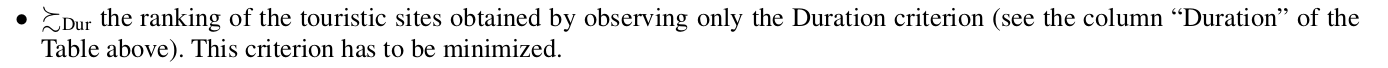

In [118]:
duration_ranking = sorted(durations.items(), key=lambda item: item[1])

print("Dur Ranking (shortest duration first):")
for rank, (site, duration) in enumerate(duration_ranking, start=1):
    print(f"{rank}. {site} - {duration} hours")

Dur Ranking (shortest duration first):
1. PC - 0.75 hours
2. AT - 1 hours
3. JT - 1.5 hours
4. SC - 1.5 hours
5. AC - 1.5 hours
6. MO - 2 hours
7. CA - 2 hours
8. CN - 2 hours
9. BS - 2 hours
10. TM - 2 hours
11. CP - 2.5 hours
12. ML - 3 hours
13. TE - 4.5 hours


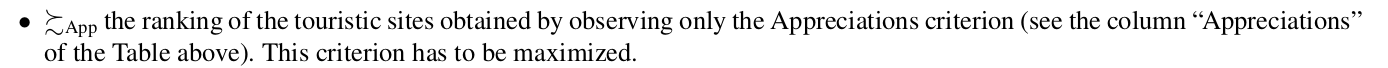

In [119]:
appreciations = {'TE': 5, 'ML': 4, 'AT': 3, 'MO': 2, 'JT': 3, 'CA': 4, 'CP': 1, 'CN': 5, 'BS': 4, 'SC': 1, 'PC': 3, 'TM': 2, 'AC': 5}

appreciation_ranking = sorted(appreciations.items(), key=lambda item: item[1], reverse=True)

print("Appreciation Ranking (highest appreciation first):")
for rank, (site, appreciation) in enumerate(appreciation_ranking, start=1):
    print(f"{rank}. {site} - {appreciation} stars")

Appreciation Ranking (highest appreciation first):
1. TE - 5 stars
2. CN - 5 stars
3. AC - 5 stars
4. ML - 4 stars
5. CA - 4 stars
6. BS - 4 stars
7. AT - 3 stars
8. JT - 3 stars
9. PC - 3 stars
10. MO - 2 stars
11. TM - 2 stars
12. CP - 1 stars
13. SC - 1 stars


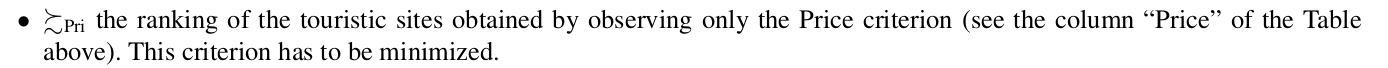

In [120]:
price_ranking = sorted(prices.items(), key=lambda item: item[1])

print("Price Ranking (lowest price first):")
for rank, (site, price) in enumerate(price_ranking, start=1):
    print(f"{rank}. {site} - {price} euros")

Price Ranking (lowest price first):
1. JT - 0 euros
2. PC - 0 euros
3. AC - 0 euros
4. CN - 7 euros
5. SC - 8.5 euros
6. CA - 10 euros
7. CP - 10 euros
8. BS - 10 euros
9. AT - 10.5 euros
10. MO - 11 euros
11. TM - 12 euros
12. ML - 14 euros
13. TE - 16.5 euros


Are these three rankings different ? To answer this question, use also, for two given rankings, the Kendall 1 or Spearman 2 rank correlation coefficient.

In [126]:
from scipy.stats import spearmanr

def extract_ranks(sorted_ranking):
    ranks = {site: rank+1 for rank, (site, _) in enumerate(sorted_ranking)}
    return ranks

duration_ranks_dict = extract_ranks(duration_ranking)
appreciation_ranks_dict = extract_ranks(appreciation_ranking)
price_ranks_dict = extract_ranks(price_ranking)

common_sites = [site for site, _ in duration_ranking]

duration_ranks = [duration_ranks_dict[site] for site in common_sites]
appreciation_ranks = [appreciation_ranks_dict[site] for site in common_sites]
price_ranks = [price_ranks_dict[site] for site in common_sites]

# Calculate Spearman rank correlation coefficients using scipy
duration_vs_appreciation = spearmanr(duration_ranks, appreciation_ranks)
duration_vs_price = spearmanr(duration_ranks, price_ranks)
appreciation_vs_price = spearmanr(appreciation_ranks, price_ranks)

print("Spearman rank correlation coefficient (scipy):")
print(f"Duration vs Appreciation: {duration_vs_appreciation.correlation:.2f}")
print(f"Duration vs Price: {duration_vs_price.correlation:.2f}")
print(f"Appreciation vs Price: {appreciation_vs_price.correlation:.2f}")

Spearman rank correlation coefficient (scipy):
Duration vs Appreciation: -0.30
Duration vs Price: 0.70
Appreciation vs Price: -0.12


In [127]:
# Spearman correlation implementation from before
def rank_data(data):
    sorted_data = sorted((val, idx) for idx, val in enumerate(data))
    ranks = [0] * len(data)
    cur_rank = 1
    for i, (val, idx) in enumerate(sorted_data):
        if i > 0 and val == sorted_data[i - 1][0]:
            ranks[idx] = ranks[sorted_data[i - 1][1]] 
        else:
            ranks[idx] = cur_rank
        cur_rank += 1
    return ranks

def spearman_correlation(x, y):
    # Step 1: Rank the data
    x_rank = rank_data(x)
    y_rank = rank_data(y)
    
    # Step 2: Calculate the differences between ranks
    d_squared_sum = sum((x_rank[i] - y_rank[i]) ** 2 for i in range(len(x)))
    
    # Step 3: Apply the Spearman correlation formula
    n = len(x)
    spearman_corr = 1 - (6 * d_squared_sum) / (n * (n**2 - 1))
    
    return spearman_corr

duration_ranking = sorted(durations.items(), key=lambda item: item[1])
appreciation_ranking = sorted(appreciations.items(), key=lambda item: item[1], reverse=True)
price_ranking = sorted(prices.items(), key=lambda item: item[1])

def extract_ranks(sorted_ranking):
    ranks = {site: rank+1 for rank, (site, _) in enumerate(sorted_ranking)}
    return ranks

duration_ranks = extract_ranks(duration_ranking)
appreciation_ranks = extract_ranks(appreciation_ranking)
price_ranks = extract_ranks(price_ranking)

common_sites = [site for site, _ in duration_ranking]

duration_rank_list = [duration_ranks[site] for site in common_sites]
appreciation_rank_list = [appreciation_ranks[site] for site in common_sites]
price_rank_list = [price_ranks[site] for site in common_sites]

duration_vs_appreciation = spearman_correlation(duration_rank_list, appreciation_rank_list)
duration_vs_price = spearman_correlation(duration_rank_list, price_rank_list)
appreciation_vs_price = spearman_correlation(appreciation_rank_list, price_rank_list)

print("Spearman rank correlation coefficient (manual implementation):")
print(f"Duration vs Appreciation: {duration_vs_appreciation:.2f}")
print(f"Duration vs Price: {duration_vs_price:.2f}")
print(f"Appreciation vs Price: {appreciation_vs_price:.2f}")

Spearman rank correlation coefficient (manual implementation):
Duration vs Appreciation: -0.30
Duration vs Price: 0.70
Appreciation vs Price: -0.12


From the Spearman score we can get the result that, two pairs of rankings ("Duration vs Appreciation" and "Appreciation vs Price") are different, while "Duration vs Price" is relatively similar.